# Laboratorium MSI - sieci neuronowe 3 - kot czy pies?

Imię i nazwisko: Paweł Okapiec

Celem ćwiczenia jest budowa sieci konwolucyjnej do klasyfikacji zdjęć psów i kotów

Wgrane rozwiązanie powinno zawierać: notebook i zapisany plik z najlepszym modelem

## Obsługa plików: Uwaga z poniższych wariantów (a, b, c) należy zrobić jeden

### a) (colab) Wgrywamy dane na google colab przez upload (to długo trwa i po resecie maszyny trzeba zrobić od nowa)
* wgrywamy przez upload (jak w poprzednim ćwiczeniu)
* wywołujemy unzip

In [ ]:
!unzip  'kagglecatsanddogs_3367a.zip'

### b) (colab) Wgrywamy dane na swój Google drive
* wgrywamy dane na swój Google drive
* łączymy się z Google drivem z colab
* wywołujemy unzip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip  'drive/MyDrive/kagglecatsanddogs_3367a.zip'

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5165.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5166.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5167.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5168.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5169.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/517.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5170.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5171.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5172.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5173.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5174.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5177.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5178.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5179.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/518.jpg  
  infla

### c) (lokalnie) Wypakowujemy plik z danymi do folderu z notebookiem (lub innego i podajemy pełną ścieżkę w zmiennej data_dir)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#import os
import cv2 # biblioteka do przetwarzania obrazów, tu tylko do wyświetlenia zdjęcia
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization ,AveragePooling2D , GlobalAveragePooling2D
from keras.optimizers import SGD

In [ ]:
# ścieżka musi się zgadzać z tym gdzie mamy dane
data_dir = 'kagglecatsanddogs_3367a/PetImages'
img_size = 128 # do sieci będziemy podawać obrazy o rozmiarze 128x128 (obrazy w danych wejściowych mają różne rozmiary)
batch_size = 32 # liczba zdjęć na jeden krok uczenia (tu nie da się podać całego zbioru na raz ze względu na RAM)

In [ ]:
# podział na zbiór uczący i walidacyjny, oraz określenie przeskalowania obrazów i rozmiaru batcha
# (https://github.com/keras-team/keras-preprocessing/issues/299 - nie można w prosty sposób uzyskać listy nazw plików w zbiorach)
train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=0,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb'
)
val = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=0,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


Model budujemy z warstw z biblioteki tf.keras.layers, potencjalnie przydatne:
* konwolucja (splot): Conv2D
* pooling: MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D (przed przejściem do warstw gęsto połączonych)
* wypłaszczenie przed warstwami gęsto połączonymi: Flatten lub GlobalAveragePooling2D
* warstwy gęsto połączone: Dense
* regularyzacja (ograniczanie przeuczenia): Dropout, BatchNormalization

To jest problem klasyfikacji binarnej, więc:
* ostatnia warstwa musi zawierać tylko jeden neuron o sigmoidalnej funkcji aktywacji
* funkcja kosztu to binary_crossentropy
* proszę zastosować jako dodatkową metrykę dokładność (accuracy)

In [ ]:
model = tf.keras.models.Sequential()
# normalizacja do zakresu <0, 1>
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1/255, input_shape=(img_size, img_size, 3)))
model.add(Conv2D(32, (3,3), input_shape=(img_size, img_size, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# TODO twoja sieć

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

#### Uwaga
uczenie będzie trwało długo, jak już zobaczymy, że uruchomiło się poprawnie, należy się zająć czymś innym

In [ ]:
# może być potrzeba więcej epok niż 10, ponowne uruchomienie komórki powoduje kontynuację uczenia (od poprzedniego stanu, nie od zera)
model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
586/586 [==============================] - 49s 84ms/step - loss: 0.6856 - accuracy: 0.5441 - val_loss: 0.6615 - val_accuracy: 0.5690
Epoch 2/20
586/586 [==============================] - 47s 80ms/step - loss: 0.6149 - accuracy: 0.6549 - val_loss: 0.5835 - val_accuracy: 0.6962
Epoch 3/20
586/586 [==============================] - 47s 79ms/step - loss: 0.5414 - accuracy: 0.7226 - val_loss: 0.5256 - val_accuracy: 0.7466
Epoch 4/20
586/586 [==============================] - 47s 80ms/step - loss: 0.4880 - accuracy: 0.7626 - val_loss: 0.4862 - val_accuracy: 0.7556
Epoch 5/20
586/586 [==============================] - 47s 80ms/step - loss: 0.4447 - accuracy: 0.7903 - val_loss: 0.4267 - val_accuracy: 0.8081
Epoch 6/20
586/586 [==============================] - 46s 79ms/step - loss: 0.3980 - accuracy: 0.8155 - val_loss: 0.3838 - val_accuracy: 0.8247
Epoch 7/20
586/586 [==============================] - 47s 81ms/step - loss: 0.3683 - accuracy: 0.8346 - val_loss: 0.3513 - val_accuracy:

In [ ]:
# ocena na zbiorze 
model.evaluate(train)

586/586 [==============================] - 29s 50ms/step - loss: 0.1341 - accuracy: 0.9497


[0.13412895798683167, 0.9497278332710266]

In [ ]:
# ocena na zbiorze walidacyjnym
model.evaluate(val)

147/147 [==============================] - 7s 48ms/step - loss: 0.2253 - accuracy: 0.9050


[0.22531862556934357, 0.9049957394599915]

In [ ]:
model.save("model_najwyzszy_procent.h5")

In [ ]:
# utworzony model można sobie zapisać
# https://www.tensorflow.org/guide/keras/save_and_serialize
# proszę zmienić ścieżkę
#model.save('path/to/location')

In [ ]:
# oraz wczytać
# model = tf.keras.models.load_model('path/to/location')

### Predykcja dla wybranego zdjęcia

In [ ]:
# można posprawdzać różne zdjęcia (również dowolne własne, niekoniecznie ze zbioru), dla jakich klasyfikator sobie nie radzi?
# ścieżka musi się zgadzać z tym gdzie mamy dane
path = 'kagglecatsanddogs_3367a/PetImages/Dog/89.jpg'

In [ ]:
image = tf.keras.preprocessing.image.load_img(path, target_size=(img_size, img_size))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr_batch = np.array([input_arr])
predictions = model.predict(input_arr_batch)

In [ ]:
# 0 - cat
# 1 - dog
predictions

array([[0.99967015]], dtype=float32)

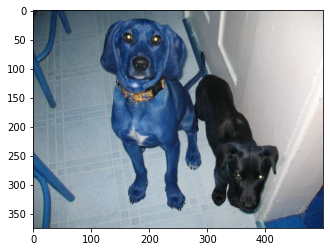

In [ ]:
img = cv2.imread(path)
plt.imshow(img)
plt.show()

### Wnioski

* Najlepszy model dał wyniki :
95% na zbiorze treningowym
90% na zbiorze walidacyjnym

* testowane struktury : MaxPooling2D, Flatten, Dropout,AveragePooling2D, BatchNormalization

* Dodanie dodatkowych warstw Conv2D , Maxpooling oraz Dropout zwiększyło dokładność sieci , struktura AveragePooling2D wprowadziła bardzo mocne zaniżenie dokładności sieci

* przy użyciu GPU do kompilacji w środowisku (20 iteracji) uczenie trwało około 15 minut 